## Q1. From https://github.com/gagolews/teaching-data/tree/master/marek download the two following excerpts from the National Health and Nutrition Examination Survey
  ### (NHANES dataset):
  ### • nhanes_adult_male_bmx_2020.csv,
  ### • nhanes_adult_female_bmx_2020.csv.
  ### They give body measurements of adult males and females.

### META DATA ABOUT THE 2 CSV DATASETS

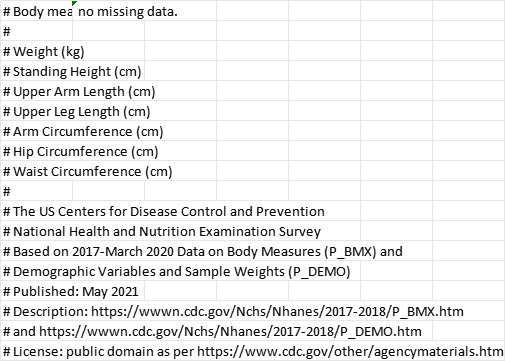

## Q2. Read the two files as numpy matrices named male and female. Each matrix consists of seven columns:
1. weight (kg),
2. standing height (cm),
3. upper arm length (cm),
4. upper leg length (cm),
5. arm circumference (cm),
6. hip circumference (cm),
7. waist circumference (cm).



### IMPORTING REQUIRED LIBRARIES

In [1]:
!pip install stats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stats: filename=stats-0.1.2a0-py3-none-any.whl size=24283 sha256=d2151a1f011fcec49ce33a2f54671df501353e7561b7c0d6274b519d76dcd09c
  Stored in directory: /root/.cache/pip/wheels/c9/85/bc/3371b9bce1e4f7b8b638e8c968a4dbd74db171ee180c48f808
Successfully built stats


In [2]:
import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr


### DEFINING THE DATAPATHS FOR THE 2 CSV FILES

In [3]:
male_file_path    = '/content/nhanes_adult_male_bmx_2020.csv'
female_file_path  = '/content/nhanes_adult_female_bmx_2020.csv'

### READING THE 2 CSV FILES


In [4]:
male_data   =pd.read_csv(male_file_path)
female_data =pd.read_csv(female_file_path)

In [5]:
female_data

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,97.1,160.2,34.7,40.8,35.8,126.1,117.9
1,91.1,152.7,33.5,33.0,38.5,125.5,103.1
2,73.0,161.2,37.4,38.0,31.8,106.2,92.0
3,61.7,157.4,38.0,34.7,29.0,101.0,90.5
4,55.4,154.6,34.6,34.0,28.3,92.5,73.2
...,...,...,...,...,...,...,...
4216,66.8,157.0,32.6,38.4,30.7,103.8,92.5
4217,116.9,167.4,42.2,43.0,40.7,128.4,120.0
4218,73.0,159.6,36.2,37.0,31.4,104.6,99.3
4219,78.6,168.5,38.1,40.2,36.0,102.4,98.5


In [6]:
male_data

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,98.8,182.3,42.0,40.1,38.2,108.2,120.4
1,74.3,184.2,41.1,41.0,30.2,94.5,86.8
2,103.7,185.3,47.0,44.0,32.0,107.8,109.6
3,86.0,167.8,39.5,38.4,29.0,106.4,108.3
4,99.4,181.6,40.4,39.9,36.0,120.2,107.0
...,...,...,...,...,...,...,...
4076,114.3,174.5,42.0,35.5,37.0,117.4,119.5
4077,94.3,178.8,37.8,44.6,35.7,105.3,99.3
4078,108.8,168.7,38.6,45.6,33.6,118.0,114.7
4079,79.5,176.4,39.5,42.0,31.4,99.8,97.1


### FINDING NULL-VALUES IN BOTH DATAFRAMES

In [7]:
#FINDING NUMBER OF NULL-VALUES IN BOTH male_data and female_data DATAFRAMES

num_null_values_female=female_data.isna().sum().sum()
num_null_values_male=male_data.isna().sum().sum()
if  num_null_values_female == 0 and num_null_values_male == 0 :
  print(' THERE ARE NO NULL-VALUES IN BOTH DATAFRAMES')
else  :
    print(f"Number of null values in male_data: {num_null_values_male}")
    print(f"Number of null values in female_data: {num_null_values_female}")


 THERE ARE NO NULL-VALUES IN BOTH DATAFRAMES


***Findings*** : ***THERE ARE NO NULL-VALUES IN BOTH DATAFRAMES***

In [8]:
male_data.describe()

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
count,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000
mean,88.364543,173.827028,39.215045,41.341240,34.334183,104.495099,101.789414
std,21.421561,7.662410,2.435982,3.214881,4.785677,12.211841,16.540779
min,36.800000,144.600000,29.600000,27.500000,19.000000,77.000000,62.300000
25%,73.300000,168.600000,37.500000,39.200000,31.000000,96.000000,90.100000
50%,85.000000,173.800000,39.100000,41.200000,34.000000,102.700000,100.600000
75%,99.800000,178.900000,40.900000,43.500000,37.300000,110.600000,111.900000
max,204.600000,199.600000,49.900000,53.000000,53.600000,174.900000,170.800000


In [9]:
female_data.describe()

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
count,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000
mean,77.403791,160.136792,36.031035,37.157972,32.710329,109.178370,98.488107
std,21.545061,7.062859,2.346150,3.214914,5.609625,15.624294,17.399588
min,32.600000,131.100000,28.500000,25.000000,17.900000,74.000000,56.400000
25%,61.600000,155.300000,34.400000,35.000000,28.700000,97.700000,86.000000
50%,73.600000,160.100000,36.000000,37.100000,32.100000,106.700000,97.100000
75%,88.700000,164.800000,37.500000,39.300000,36.100000,117.900000,109.400000
max,180.900000,189.300000,46.700000,49.100000,57.200000,179.000000,178.000000


### REMOVING OUTLIERS FROM BOTH DATAFRAMES

In [10]:
#REMOVING OUTLIERS FROM male_data DATAFRAME
q1m=male_data.quantile(0.25)
q3m=male_data.quantile(0.75)
iqrm=q3m-q1m
lower_bound = q1m-1.5*iqrm
upper_bound = q3m + 1.5*iqrm
male_data_filtered=male_data[((male_data>=lower_bound ) & (male_data<=upper_bound)).all(axis=1)]


#REMOVING OUTLIERS FROM female_data DATAFRAME
q1f=female_data.quantile(0.25)
q3f=female_data.quantile(0.75)
iqrf=q3f-q1f
lower_bound = q1f-1.5*iqrf
upper_bound = q3f + 1.5*iqrf
female_data_filtered=female_data[((female_data>=lower_bound ) &
                             (female_data<=upper_bound)).all(axis=1)]


In [11]:
male_data_filtered

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,98.8,182.3,42.0,40.1,38.2,108.2,120.4
1,74.3,184.2,41.1,41.0,30.2,94.5,86.8
3,86.0,167.8,39.5,38.4,29.0,106.4,108.3
4,99.4,181.6,40.4,39.9,36.0,120.2,107.0
5,90.2,162.5,38.7,38.0,37.3,110.2,116.2
...,...,...,...,...,...,...,...
4076,114.3,174.5,42.0,35.5,37.0,117.4,119.5
4077,94.3,178.8,37.8,44.6,35.7,105.3,99.3
4078,108.8,168.7,38.6,45.6,33.6,118.0,114.7
4079,79.5,176.4,39.5,42.0,31.4,99.8,97.1


In [12]:
female_data_filtered

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,97.1,160.2,34.7,40.8,35.8,126.1,117.9
1,91.1,152.7,33.5,33.0,38.5,125.5,103.1
2,73.0,161.2,37.4,38.0,31.8,106.2,92.0
3,61.7,157.4,38.0,34.7,29.0,101.0,90.5
4,55.4,154.6,34.6,34.0,28.3,92.5,73.2
...,...,...,...,...,...,...,...
4215,57.0,160.8,36.2,36.4,27.8,93.6,80.0
4216,66.8,157.0,32.6,38.4,30.7,103.8,92.5
4218,73.0,159.6,36.2,37.0,31.4,104.6,99.3
4219,78.6,168.5,38.1,40.2,36.0,102.4,98.5


In [13]:
male_data_filtered.describe()

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
count,3856.000000,3856.000000,3856.000000,3856.000000,3856.000000,3856.000000,3856.00000
mean,86.042142,173.600052,39.122251,41.281665,33.930083,103.095513,100.26569
std,17.969899,7.270482,2.318626,3.039882,4.274093,10.048445,14.78250
min,41.200000,153.300000,32.600000,32.800000,21.700000,77.500000,62.30000
25%,72.900000,168.500000,37.500000,39.200000,30.875000,95.800000,89.90000
50%,84.100000,173.600000,39.000000,41.200000,33.700000,102.200000,99.70000
75%,97.525000,178.525000,40.700000,43.300000,36.800000,109.300000,110.30000
max,139.400000,193.900000,46.000000,49.900000,46.600000,132.300000,142.40000


In [14]:
female_data_filtered.describe()

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
count,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000
mean,74.916077,159.899348,35.889917,37.120793,32.181063,107.470855,96.791247
std,18.082364,6.738023,2.174287,3.021035,5.018243,13.472572,15.583361
min,32.600000,141.100000,29.800000,29.000000,17.900000,74.000000,56.400000
25%,61.100000,155.200000,34.400000,35.000000,28.500000,97.300000,85.450000
50%,72.500000,159.800000,36.000000,37.100000,31.800000,106.000000,96.200000
75%,85.700000,164.500000,37.400000,39.200000,35.500000,116.000000,107.550000
max,129.100000,178.900000,42.000000,45.700000,47.200000,148.100000,143.800000


### converting the 2 dataframes to numpy matrices named male and female

In [15]:

male    = male_data_filtered.to_numpy()
female  = female_data_filtered.to_numpy()
# Check the shape and first few rows of the matrices
print("Male data shape:", male.shape)
print("First few rows of male data:\n", male[:5])
print("Female data shape:", female.shape)
print("First few rows of female data:\n", female[:5])

Male data shape: (3856, 7)
First few rows of male data:
 [[ 98.8 182.3  42.   40.1  38.2 108.2 120.4]
 [ 74.3 184.2  41.1  41.   30.2  94.5  86.8]
 [ 86.  167.8  39.5  38.4  29.  106.4 108.3]
 [ 99.4 181.6  40.4  39.9  36.  120.2 107. ]
 [ 90.2 162.5  38.7  38.   37.3 110.2 116.2]]
Female data shape: (3987, 7)
First few rows of female data:
 [[ 97.1 160.2  34.7  40.8  35.8 126.1 117.9]
 [ 91.1 152.7  33.5  33.   38.5 125.5 103.1]
 [ 73.  161.2  37.4  38.   31.8 106.2  92. ]
 [ 61.7 157.4  38.   34.7  29.  101.   90.5]
 [ 55.4 154.6  34.6  34.   28.3  92.5  73.2]]


 **summary** : *We have converted the DataFrames into numpy matrices named male and female, each consisting of seven columns representing different body measurements.*

after removing outliers :
*  *Male numpy matrix  has 3856 rows and  7 columns*
*  *female numpy matrix  has 3987 rows and  7 columns*




## Q3. On a single plot (use matplotlib.pytplot.subplot)
### draw two histograms: for female weights (top subfigure) , and for male weights (bottom subfigure)
###  Call matplotlib.pyplot.xlim to make the xaxis limits identical for both subfigures (work out the appropriate limits yourself).

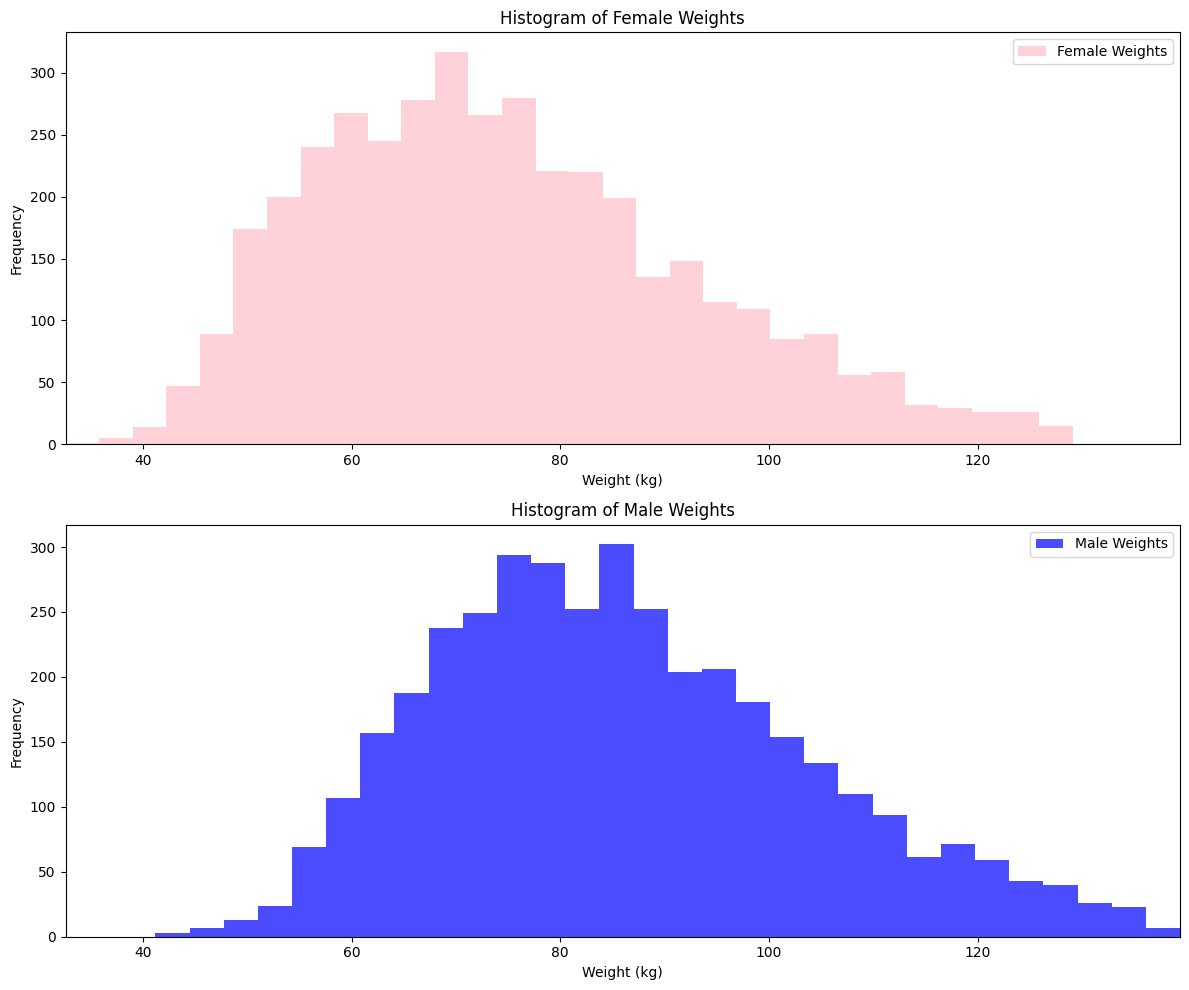

In [16]:
import matplotlib.pyplot as plt

# Extracting the weights
male_weights = male[:, 0]
female_weights = female[:, 0]

# Determine the x-axis limits
x_min = min(male_weights.min(), female_weights.min())
x_max = max(male_weights.max(), female_weights.max())

# Create subplots
plt.figure(figsize=(12, 10))

# Top subfigure for female weights
plt.subplot(2, 1, 1)
plt.hist(female_weights, bins=30, color='pink', alpha=0.7, label='Female Weights')
plt.title('Histogram of Female Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.xlim(x_min, x_max)
plt.legend()

# Bottom subfigure for male weights
plt.subplot(2, 1, 2)
plt.hist(male_weights, bins=30, color='blue', alpha=0.7, label='Male Weights')
plt.title('Histogram of Male Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.xlim(x_min, x_max)
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


**Summary**:


- Both histograms have the same x-axis limits, ranging from 40 to 200 kg, allowing for a direct comparison of weight distributions between the genders.
- Female weights tend to be more concentrated in the lower range (50-80 kg), while male weights are more spread out and centered around a higher range (60-100 kg).
- The right-skewness in the female weight distribution indicates that there are more outliers or extreme values on the higher end compared to males.
- The male weight distribution is more symmetric, indicating a more even spread of weights around the mean.



## Q4. Call matplotlib.pyplot.boxplot to draw a box-and-whisker plot, with two boxes side by side, giving the male and female weights so that they can be compared to each other.
Note that the boxplot function can be fed with a list of two vectors like [female_weights,
male_weights]. In your own words, discuss the results.

Metric                                        Value
---------------------------------------- ----------
Female weights Q1 value:                 61.1
Male weights Q1 value:                   72.9
Female weights Q2 value (median):        72.5
Male weights Q2 value (median):          84.1
Female weights Q3 value:                 85.7
Male weights Q3 value:                   97.525
IQR Female weights:                      24.6
IQR Male weights:                        24.625
Female weights upper bound value:        122.6
Male weights upper bound value:          134.4625
Female weights lower bound value:        24.2
Male weights lower bound value:          35.962500000000006
Number of outliers in female weights:    41
Number of outliers in male weights:      19


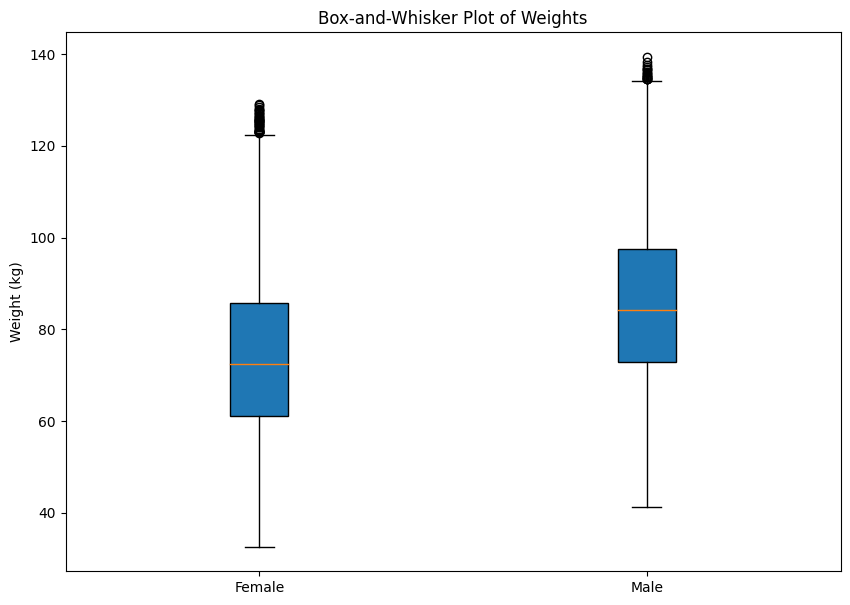

In [17]:


# male_weights and female_weights are already defined as numpy arrays

# Calculate Q1 (25th percentile) ,Q2 (median value) and Q3 (75th percentile) for both datasets
Q1_male = np.percentile(male_weights, 25)
Q2_male = np.percentile(male_weights, 50)
Q3_male = np.percentile(male_weights, 75)
Q1_female = np.percentile(female_weights, 25)
Q2_female = np.percentile(female_weights, 50)
Q3_female = np.percentile(female_weights, 75)

# Calculate IQR for both datasets
IQR_male = Q3_male - Q1_male
IQR_female = Q3_female - Q1_female

# Calculate the lower and upper bounds for detecting outliers
lower_bound_male = Q1_male - 1.5 * IQR_male
upper_bound_male = Q3_male + 1.5 * IQR_male
lower_bound_female = Q1_female - 1.5 * IQR_female
upper_bound_female = Q3_female + 1.5 * IQR_female

# Detect outliers
outliers_male = male_weights[(male_weights < lower_bound_male) | (male_weights > upper_bound_male)]
outliers_female = female_weights[(female_weights < lower_bound_female) | (female_weights > upper_bound_female)]

# Count the number of outliers
num_outliers_male = len(outliers_male)
num_outliers_female = len(outliers_female)

# Bold formatting
bold_start = "\033[1m"
bold_end = "\033[0m"
# Print the results with bold formatting and aligned output
print("{:<40} {:>10}".format('Metric', 'Value'))
print("{:<40} {:>10}".format('-' * 40, '-' * 10))

print("{:<40} {:>10}".format("Female weights Q1 value:", bold_start + str(Q1_female) + bold_end))
print("{:<40} {:>10}".format("Male weights Q1 value:", bold_start + str(Q1_male) + bold_end))
print("{:<40} {:>10}".format("Female weights Q2 value (median):", bold_start + str(np.median(female_weights)) + bold_end))
print("{:<40} {:>10}".format("Male weights Q2 value (median):", bold_start + str(np.median(male_weights)) + bold_end))
print("{:<40} {:>10}".format("Female weights Q3 value:", bold_start + str(Q3_female) + bold_end))
print("{:<40} {:>10}".format("Male weights Q3 value:", bold_start + str(Q3_male) + bold_end))
print("{:<40} {:>10}".format("IQR Female weights:", bold_start + str(IQR_female) + bold_end))
print("{:<40} {:>10}".format("IQR Male weights:", bold_start + str(IQR_male) + bold_end))
print("{:<40} {:>10}".format("Female weights upper bound value:", bold_start + str(round(upper_bound_female,2)) + bold_end))
print("{:<40} {:>10}".format("Male weights upper bound value:", bold_start + str(upper_bound_male) + bold_end))
print("{:<40} {:>10}".format("Female weights lower bound value:", bold_start + str(round(lower_bound_female,2)) + bold_end))
print("{:<40} {:>10}".format("Male weights lower bound value:", bold_start + str(lower_bound_male) + bold_end))
print("{:<40} {:>10}".format("Number of outliers in female weights:", bold_start + str(num_outliers_female) + bold_end))
print("{:<40} {:>10}".format("Number of outliers in male weights:", bold_start + str(num_outliers_male) + bold_end))

# Create box-and-whisker plot
plt.figure(figsize=(10, 7))
plt.boxplot([female_weights, male_weights], labels=['Female', 'Male'], patch_artist=True)
plt.title('Box-and-Whisker Plot of Weights')
plt.ylabel('Weight (kg)')
plt.show()
import pandas as pd
import numpy as np



**Summary**:

**Central Tendency**: *The median weight is higher for males (84.1 kg) compared to females (72.5 kg), indicating that males tend to weigh more than females on average.*

**Variability**: *The IQR for both genders is similar,. This suggests that the middle 50% of the weights are similarly spread out for both genders.*


**Outliers**: *Both male and female weight distributions exhibit a significant number of outliers. These outliers are more frequent in the upper range, indicating that a notable number of participants have weights significantly higher than the typical range.*





## Q5. Compute the basic numerical aggregates of the male and female weights (measures of location, dispersion, and shape). In your own words, describe and compare the two distributions (e.g., are they left skewed, which one has more dispersion, and so forth).

In [18]:
import numpy as np
from scipy.stats import skew, kurtosis



# Compute basic numerical aggregates for male weights
mean_male = np.mean(male_weights)
median_male = np.median(male_weights)
variance_male = np.var(male_weights)
std_dev_male = np.std(male_weights)
range_male = np.ptp(male_weights)  # ptp: peak to peak, equivalent to max - min
iqr_male = np.percentile(male_weights, 75) - np.percentile(male_weights, 25)
skewness_male = skew(male_weights)
kurtosis_male = kurtosis(male_weights)

# Compute basic numerical aggregates for female weights
mean_female = np.mean(female_weights)
median_female = np.median(female_weights)
variance_female = np.var(female_weights)
std_dev_female = np.std(female_weights)
range_female = np.ptp(female_weights)
iqr_female = np.percentile(female_weights, 75) - np.percentile(female_weights, 25)
skewness_female = skew(female_weights)
kurtosis_female = kurtosis(female_weights)

# Print the results with formatting
print(f"{'Metric':<30} {'Male Weights':>15} {'Female Weights':>15}")
print(f"{'-'*60}")
print(f"{'Mean':<30} {mean_male:>15.2f} {mean_female:>15.2f}")
print(f"{'Median':<30} {median_male:>15.2f} {median_female:>15.2f}")
print(f"{'Variance':<30} {variance_male:>15.2f} {variance_female:>15.2f}")
print(f"{'Standard Deviation':<30} {std_dev_male:>15.2f} {std_dev_female:>15.2f}")
print(f"{'Range':<30} {range_male:>15.2f} {range_female:>15.2f}")
print(f"{'IQR':<30} {iqr_male:>15.2f} {iqr_female:>15.2f}")
print(f"{'Skewness':<30} {skewness_male:>15.2f} {skewness_female:>15.2f}")
print(f"{'Kurtosis':<30} {kurtosis_male:>15.2f} {kurtosis_female:>15.2f}")


Metric                            Male Weights  Female Weights
------------------------------------------------------------
Mean                                     86.04           74.92
Median                                   84.10           72.50
Variance                                322.83          326.89
Standard Deviation                       17.97           18.08
Range                                    98.20           96.50
IQR                                      24.62           24.60
Skewness                                  0.47            0.56
Kurtosis                                 -0.21           -0.15


### FINDINGS AND SUMMARY

#### Central Tendency:
- **Mean:** The mean weight is higher for males (86.04 kg) compared to females (74.92 kg).
- **Median:** Similarly, the median weight is higher for males (84.10 kg) than for females (72.50 kg).

#### Dispersion:
- **Variance and Standard Deviation:** Both metrics indicate that the dispersion (spread) of weights is similar between males and females. Males have a variance of 322.83 and a standard deviation of 17.97 kg, while females have a variance of 326.89 and a standard deviation of 18.08 kg.
- **Range:** The range, which is the difference between the maximum and minimum weights, is slightly greater for males (98.20 kg) compared to females (96.50 kg), indicating a slightly broader spread in the weights of males.
- **Interquartile Range (IQR):** The IQR, which measures the middle 50% of the data, is almost identical for both males (24.62 kg) and females (24.60 kg), suggesting a similar spread within the central portion of the data for both genders.

#### Shape:
- **Skewness:** Both distributions are right-skewed (positively skewed), with skewness values of 0.47 for males and 0.56 for females. This indicates that both distributions have longer tails on the right side, with females being slightly more skewed.
- **Kurtosis:** Both distributions have slightly negative kurtosis values (-0.21 for males and -0.15 for females), indicating that they are platykurtic. This means they have flatter peaks and thinner tails compared to a normal distribution, with males having a slightly lower kurtosis.

### Summary:
- **Central Tendency:** Males generally weigh more than females.
- **Dispersion:** The spread of weights is quite similar for both genders, with males having a slightly larger range.
- **Shape:** Both distributions are right-skewed and platykurtic, with similar skewness and kurtosis values.

Overall, while both distributions share many similarities in terms of dispersion and shape, the key difference lies in the central tendency, with males generally having higher weights than females. The distributions show a slight skew to the right, indicating that there are more higher weights, and a flatness compared to the normal distribution, indicating a wider spread around the mean.

## 6. To the female matrix, add the eight column which gives the body mass indices of all the female participants.

In [19]:
female.shape

(3987, 7)

SINCE the body height is in cms ,we are dividing it with 100 to make it in meters, so that we can calculate the bmi.

 ***bmi = weight(kgs) / (height(meters)) **2***

In [20]:
bmi=np.round(female[:,0]/(female[:,1]/100)**2,2)
female_with_bmi=np.column_stack((female,bmi))

In [21]:
female_with_bmi[:7,:] # returns 7 rows and all columns

array([[ 97.1 , 160.2 ,  34.7 ,  40.8 ,  35.8 , 126.1 , 117.9 ,  37.84],
       [ 91.1 , 152.7 ,  33.5 ,  33.  ,  38.5 , 125.5 , 103.1 ,  39.07],
       [ 73.  , 161.2 ,  37.4 ,  38.  ,  31.8 , 106.2 ,  92.  ,  28.09],
       [ 61.7 , 157.4 ,  38.  ,  34.7 ,  29.  , 101.  ,  90.5 ,  24.9 ],
       [ 55.4 , 154.6 ,  34.6 ,  34.  ,  28.3 ,  92.5 ,  73.2 ,  23.18],
       [ 62.  , 144.7 ,  32.5 ,  34.2 ,  29.8 , 106.7 ,  84.8 ,  29.61],
       [ 66.2 , 166.5 ,  37.5 ,  37.6 ,  32.  ,  96.3 ,  95.7 ,  23.88]])

In [22]:
female_with_bmi.shape

(3987, 8)

##7. Create a new matrix zfemale being a version of the female dataset with all its columns standardised (by computing the z-scores of each column).

In [23]:
mean = np.mean(female_with_bmi, axis=0)
std_dev = np.std(female_with_bmi, axis=0)
zfemale = (female_with_bmi - mean) / std_dev

In [24]:
mean

array([ 74.91607725, 159.89934788,  35.88991723,  37.12079258,
        32.18106346, 107.47085528,  96.79124655,  29.26604214])

In [25]:
std_dev

array([18.08009602,  6.73717787,  2.17401455,  3.02065568,  5.01761333,
       13.47088187, 15.58140661,  6.66310243])

In [26]:
female_with_bmi[:5,:]

array([[ 97.1 , 160.2 ,  34.7 ,  40.8 ,  35.8 , 126.1 , 117.9 ,  37.84],
       [ 91.1 , 152.7 ,  33.5 ,  33.  ,  38.5 , 125.5 , 103.1 ,  39.07],
       [ 73.  , 161.2 ,  37.4 ,  38.  ,  31.8 , 106.2 ,  92.  ,  28.09],
       [ 61.7 , 157.4 ,  38.  ,  34.7 ,  29.  , 101.  ,  90.5 ,  24.9 ],
       [ 55.4 , 154.6 ,  34.6 ,  34.  ,  28.3 ,  92.5 ,  73.2 ,  23.18]])

In [27]:
zfemale[:5,:]

array([[ 1.22698036,  0.04462582, -0.54733637,  1.21801616,  0.7212466 ,
         1.38291946,  1.35473991,  1.28678164],
       [ 0.89512372, -1.06859994, -1.0993106 , -1.36420467,  1.25935104,
         1.33837895,  0.40488985,  1.47138033],
       [-0.10597716,  0.19305593,  0.69460564,  0.29106509, -0.07594516,
        -0.09434091, -0.30749769, -0.17650068],
       [-0.73097384, -0.37097846,  0.97059275, -0.80141295, -0.63397939,
        -0.4803587 , -0.40376628, -0.65525664],
       [-1.07942332, -0.78658275, -0.59333422, -1.03315071, -0.77348795,
        -1.11134931, -1.51406398, -0.91339465]])

## 8. Draw a scatterplot matrix (pairplot)

for the standardised versions of height, weight, waist circumference, hip circumference, and BMI of the females (based on zfemale).

Compute Pearson’s and Spearman’s correlation coefficients for all pairs of variables.

Interpret the obtained results.

In [28]:
# these are the columns we have in "zfemale" matrix (all values of "female_with_bmi" matrix are standardized using z-scores)  (total 8 columns) .
# weight (kg),
# standing height (cm),
# upper arm length (cm),
# upper leg length (cm),
# arm circumference (cm),
# hip circumference (cm),
# waist circumference (cm),
# bmi.

# returning top 5 rows from the "zfemale" matrix
zfemale[:5,:]

array([[ 1.22698036,  0.04462582, -0.54733637,  1.21801616,  0.7212466 ,
         1.38291946,  1.35473991,  1.28678164],
       [ 0.89512372, -1.06859994, -1.0993106 , -1.36420467,  1.25935104,
         1.33837895,  0.40488985,  1.47138033],
       [-0.10597716,  0.19305593,  0.69460564,  0.29106509, -0.07594516,
        -0.09434091, -0.30749769, -0.17650068],
       [-0.73097384, -0.37097846,  0.97059275, -0.80141295, -0.63397939,
        -0.4803587 , -0.40376628, -0.65525664],
       [-1.07942332, -0.78658275, -0.59333422, -1.03315071, -0.77348795,
        -1.11134931, -1.51406398, -0.91339465]])

In [29]:
# lets remove unnecessary columns which doesnot mentioned in the 8th question .
cols_to_remove = [2, 3, 4]

#removing these columns from the zfemale matrix ( upper arm length (cm), upper leg length (cm), arm circumference (cm),)
zfemale_reduced = np.delete(zfemale, cols_to_remove, axis=1)

In [30]:
#returning first 5 rows from the "zfemale_reduced" matrix which is having only 5 columns  after removing  2,3,4columns from "zfemale" matrix
zfemale_reduced[:5,:]

array([[ 1.22698036,  0.04462582,  1.38291946,  1.35473991,  1.28678164],
       [ 0.89512372, -1.06859994,  1.33837895,  0.40488985,  1.47138033],
       [-0.10597716,  0.19305593, -0.09434091, -0.30749769, -0.17650068],
       [-0.73097384, -0.37097846, -0.4803587 , -0.40376628, -0.65525664],
       [-1.07942332, -0.78658275, -1.11134931, -1.51406398, -0.91339465]])

In [31]:
# converting the "zfemale_reduced" matrix into  "zfemale_reduced_df" dataframe to plot the pairpplot .
zfemale_reduced_df = pd.DataFrame(zfemale_reduced, columns=["weight (kg)", "standing height (cm)", "hip circumference (cm)", "waist circumference (cm)", "BMI"])

#returning  top 5 entries from the "zfemale_reduced_df" dataframe
zfemale_reduced_df.head()

,weight (kg),standing height (cm),hip circumference (cm),waist circumference (cm),BMI
0,1.226980,0.044626,1.382919,1.354740,1.286782
1,0.895124,-1.068600,1.338379,0.404890,1.471380
2,-0.105977,0.193056,-0.094341,-0.307498,-0.176501
3,-0.730974,-0.370978,-0.480359,-0.403766,-0.655257
4,-1.079423,-0.786583,-1.111349,-1.514064,-0.913395


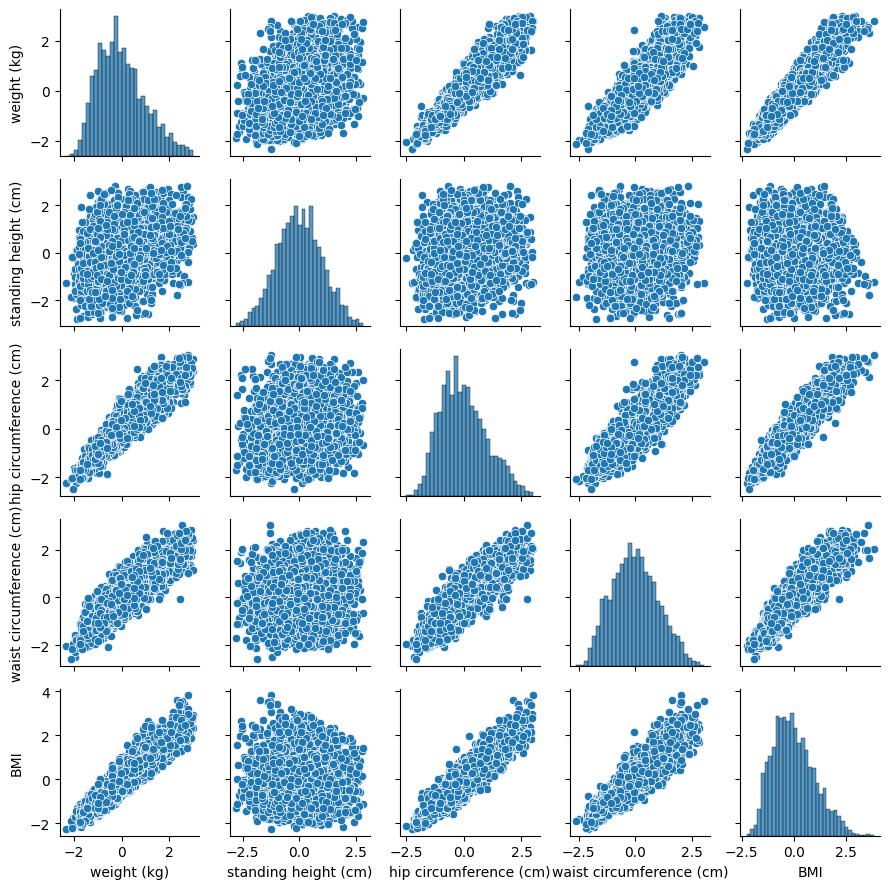

In [32]:
# creating pairplot of "zfemale_reduced_df" dataframe using seaborn library
pairplot=sns.pairplot(zfemale_reduced_df,height=1.8)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [33]:
# Computing Pearson’s and Spearman’s correlation coefficients
pearson_corr = zfemale_reduced_df.corr(method='pearson')
spearman_corr = zfemale_reduced_df.corr(method='spearman')

In [34]:
# Pearson’s correlation coefficients for all pairs of variables
pearson_corr

,weight (kg),standing height (cm),hip circumference (cm),waist circumference (cm),BMI
weight (kg),1.000000,0.317725,0.936267,0.888042,0.935236
standing height (cm),0.317725,1.000000,0.161673,0.074614,-0.029437
hip circumference (cm),0.936267,0.161673,1.000000,0.877816,0.931677
waist circumference (cm),0.888042,0.074614,0.877816,1.000000,0.908093
BMI,0.935236,-0.029437,0.931677,0.908093,1.000000


In [35]:
# Spearman’s correlation coefficients for all pairs of variables
spearman_corr

,weight (kg),standing height (cm),hip circumference (cm),waist circumference (cm),BMI
weight (kg),1.000000,0.310180,0.940670,0.890392,0.934749
standing height (cm),0.310180,1.000000,0.170664,0.069810,-0.023336
hip circumference (cm),0.940670,0.170664,1.000000,0.875215,0.928146
waist circumference (cm),0.890392,0.069810,0.875215,1.000000,0.914555
BMI,0.934749,-0.023336,0.928146,0.914555,1.000000


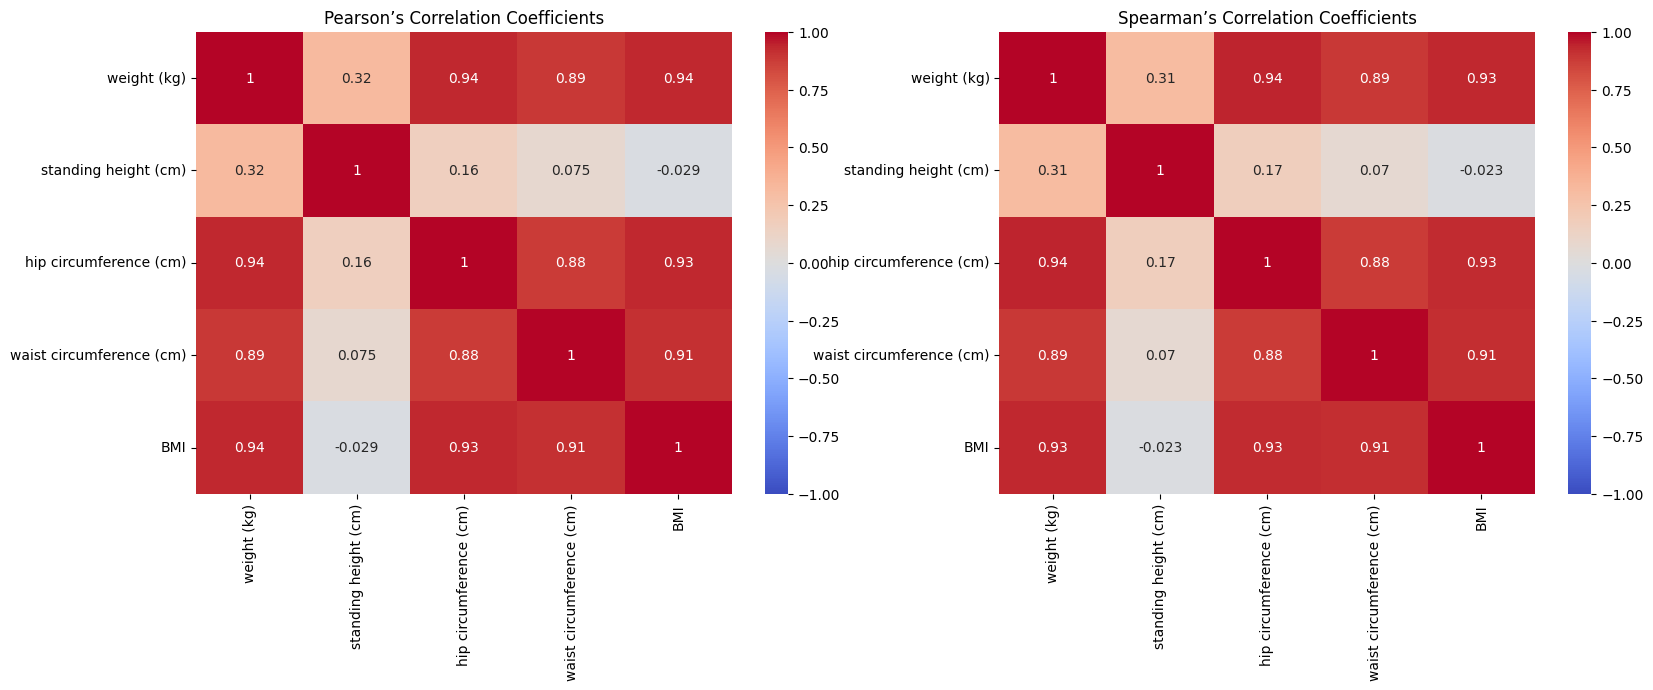

In [36]:
# Displaying correlation matrices visually
plt.figure(figsize=(19, 6))
plt.subplot(1, 2, 1)
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Pearson’s Correlation Coefficients")

plt.subplot(1, 2, 2)
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Spearman’s Correlation Coefficients")

plt.show()


**Interpretation of Results**

There is a strong positive linear relationship between weight and BMI.

There is a clear positive linear relationship between weight and hip circumference.

Similar to hip circumference, there is a positive linear relationship between weight and waist circumference.

There is a strong positive linear relationship between hip and waist circumference. This indicates that individuals with larger hips tend to also have larger waists.

There is no clear linear relationship between height and BMI, indicating that BMI is more directly related to weight than to height alone.

There appears to be a slight positive correlation between Height and Hip/Waist Circumference, but it is not as strong as the correlation between weight and the circumferences.

Weight will likely have a high positive Pearson and Spearman correlation with BMI, hip circumference, and waist circumference.

Height might have lower correlation values with BMI but moderate correlations with hip and waist circumference.

## 9. Computing the

waist circumference to height ratio and

the waist circumference to hip circumference ratio of

the male and female participants by adding two more columns to
the males and females matrices.

In [37]:
# 'male' and 'female' matrices are already defined
male[:5,:] #7 columns in male matrix

array([[ 98.8, 182.3,  42. ,  40.1,  38.2, 108.2, 120.4],
       [ 74.3, 184.2,  41.1,  41. ,  30.2,  94.5,  86.8],
       [ 86. , 167.8,  39.5,  38.4,  29. , 106.4, 108.3],
       [ 99.4, 181.6,  40.4,  39.9,  36. , 120.2, 107. ],
       [ 90.2, 162.5,  38.7,  38. ,  37.3, 110.2, 116.2]])

In [38]:
female[:5,:] #7 columns in female matrix

array([[ 97.1, 160.2,  34.7,  40.8,  35.8, 126.1, 117.9],
       [ 91.1, 152.7,  33.5,  33. ,  38.5, 125.5, 103.1],
       [ 73. , 161.2,  37.4,  38. ,  31.8, 106.2,  92. ],
       [ 61.7, 157.4,  38. ,  34.7,  29. , 101. ,  90.5],
       [ 55.4, 154.6,  34.6,  34. ,  28.3,  92.5,  73.2]])

In [39]:
# Compute waist to height ratio
waist_to_height_male = np.round(male[:, 6] / male[:, 1],2)
waist_to_height_female = np.round(female[:, 6] / female[:, 1],2)

# Compute waist to hip ratio
waist_to_hip_male = np.round(male[:, 6] / male[:, 5],2)
waist_to_hip_female = np.round(female[:, 6] / female[:, 5],2)

# Add the new columns to the matrices
male_with_ratios = np.column_stack((male, waist_to_height_male, waist_to_hip_male))
female_with_ratios = np.column_stack((female, waist_to_height_female, waist_to_hip_female))

In [40]:
# Display the first few rows of the updated matrices to verify the new columns are added correctly
male_with_ratios[:5,:] #total 9 columns (2 being added )

array([[ 98.8 , 182.3 ,  42.  ,  40.1 ,  38.2 , 108.2 , 120.4 ,   0.66,
          1.11],
       [ 74.3 , 184.2 ,  41.1 ,  41.  ,  30.2 ,  94.5 ,  86.8 ,   0.47,
          0.92],
       [ 86.  , 167.8 ,  39.5 ,  38.4 ,  29.  , 106.4 , 108.3 ,   0.65,
          1.02],
       [ 99.4 , 181.6 ,  40.4 ,  39.9 ,  36.  , 120.2 , 107.  ,   0.59,
          0.89],
       [ 90.2 , 162.5 ,  38.7 ,  38.  ,  37.3 , 110.2 , 116.2 ,   0.72,
          1.05]])

In [41]:
female_with_ratios[:5,:] #total 9 columns (2 being added )

array([[ 97.1 , 160.2 ,  34.7 ,  40.8 ,  35.8 , 126.1 , 117.9 ,   0.74,
          0.93],
       [ 91.1 , 152.7 ,  33.5 ,  33.  ,  38.5 , 125.5 , 103.1 ,   0.68,
          0.82],
       [ 73.  , 161.2 ,  37.4 ,  38.  ,  31.8 , 106.2 ,  92.  ,   0.57,
          0.87],
       [ 61.7 , 157.4 ,  38.  ,  34.7 ,  29.  , 101.  ,  90.5 ,   0.57,
          0.9 ],
       [ 55.4 , 154.6 ,  34.6 ,  34.  ,  28.3 ,  92.5 ,  73.2 ,   0.47,
          0.79]])

## 10. Draw a box-and-whisker plot with four boxes side by side, comparing the distribution
of the waistto-height ratio and the waist-to-hip ratio of both male and female participants.
Explain what you see.

In [42]:
# we already computed the waist_to_height_male, waist_to_height_female, waist_to_hip_male, waist_to_hip_female in before query.
#now lets see the arrays and their length
print('waist_to_height_male array:',waist_to_height_male)
print('length of waist_to_height_male array :',len(waist_to_height_male))
print('----------------------------------------------------------------------------')
print('waist_to_height_female array:',waist_to_height_female)
print('length of waist_to_height_female array :',len(waist_to_height_female))
print('----------------------------------------------------------------------------')
print('waist_to_hip_male array:',waist_to_hip_male)
print('length of waist_to_hip_male array :',len(waist_to_hip_male))
print('----------------------------------------------------------------------------')
print('waist_to_hip_female array:',waist_to_hip_female)
print('length of waist_to_hip_female array :',len(waist_to_hip_female))

waist_to_height_male array: [0.66 0.47 0.65 ... 0.68 0.55 0.52]
length of waist_to_height_male array : 3856
----------------------------------------------------------------------------
waist_to_height_female array: [0.74 0.68 0.57 ... 0.62 0.58 0.74]
length of waist_to_height_female array : 3987
----------------------------------------------------------------------------
waist_to_hip_male array: [1.11 0.92 1.02 ... 0.97 0.97 0.96]
length of waist_to_hip_male array : 3856
----------------------------------------------------------------------------
waist_to_hip_female array: [0.93 0.82 0.87 ... 0.95 0.96 0.91]
length of waist_to_hip_female array : 3987


In [ ]:
#creating a "ratio" array by concatinating all the ratios

ratio = np.concatenate([waist_to_height_male, waist_to_height_female, waist_to_hip_male, waist_to_hip_female])
print('length of ratio array :',len(ratio))


#Creating  an array  "ratio_type" that contains labels for each ratio type, repeated for the length of the respective ratio data.
#This array will help in labeling the data points when plotting or analyzing them.

ratio_type = ['Waist-to-Height'] * len(waist_to_height_male) + ['Waist-to-Height'] * len(waist_to_height_female) + ['Waist-to-Hip'] * len(waist_to_hip_male) + ['Waist-to-Hip'] * len(waist_to_hip_female)
print('length of ratio_type array :',len(ratio_type))  #object datatype


#Create an array called "Gender" that contains labels for each Gender type(male and female),
#repeated for the length of the respective Gender data (male -4081  +female-4221 ).

gender = ['Male'] * len(waist_to_height_male) + ['Female'] * len(waist_to_height_female) +['Male'] * len(waist_to_hip_male) + ['Female'] * len(waist_to_hip_female)
print('length of gender array :',len(gender))

# creating a dictionary with the above arrays (ratio,ratio_type,Gender)
ratio_data = { 'Ratio': ratio, 'Ratio_type': ratio_type, 'Gender': gender }
# Combine data into a single DataFrame for seaborn to plot the boxplots
ratio_df = pd.DataFrame(ratio_data)
print('shape of ratio_df dataframe :',ratio_df.shape)
ratio_df

length of ratio array : 15686
length of ratio_type array : 15686
length of gender array : 15686
shape of ratio_df dataframe : (15686, 3)


,Ratio,Ratio_type,Gender
0,0.66,Waist-to-Height,Male
1,0.47,Waist-to-Height,Male
2,0.65,Waist-to-Height,Male
3,0.59,Waist-to-Height,Male
4,0.72,Waist-to-Height,Male
...,...,...,...
15681,0.85,Waist-to-Hip,Female
15682,0.89,Waist-to-Hip,Female
15683,0.95,Waist-to-Hip,Female
15684,0.96,Waist-to-Hip,Female


In [ ]:
print(ratio_df.Ratio_type.value_counts())
print('------------------------------------')
print(ratio_df.Gender.value_counts())

Ratio_type
Waist-to-Height    7843
Waist-to-Hip       7843
Name: count, dtype: int64
------------------------------------
Gender
Female    7974
Male      7712
Name: count, dtype: int64


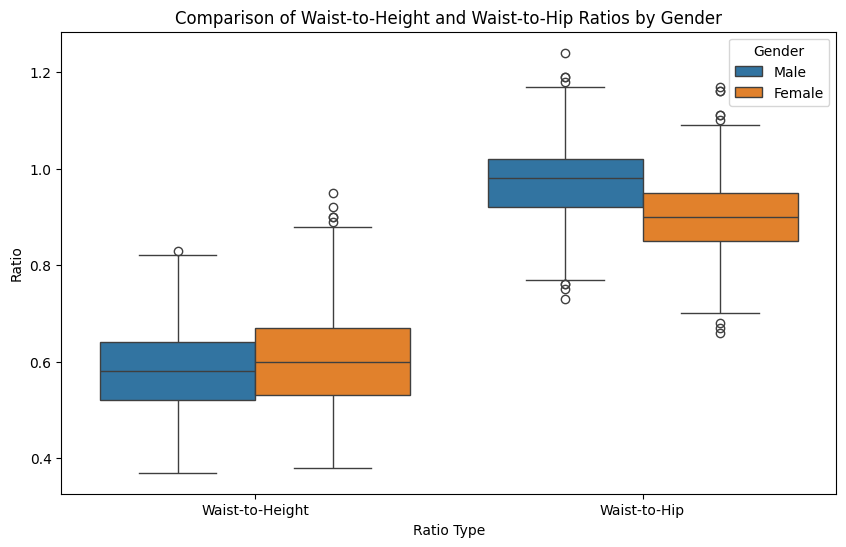

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ratio_type', y='Ratio', hue='Gender', data=ratio_df)
plt.title('Comparison of Waist-to-Height and Waist-to-Hip Ratios by Gender')
plt.xlabel('Ratio Type')
plt.ylabel('Ratio')
plt.show()


**Waist-to-Height Ratio**

The median waist-to-height ratio for males is slightly below 0.6.



The median waist-to-height ratio for females is slightly above 0.6.



There are outliers above the upper whisker for both male and female's Waist-to-Height Ratio

Both males and females have similar distributions, but females have a slightly higher median indicating a slightly higher  waist-to-height ratio.

**Waist-to-Hip Ratio**

The median waist-to-hip ratio for males is close to 0.9.

The median waist-to-hip ratio for females is around 0.8.


Males have a higher median waist-to-hip ratio compared to females.

There are a few outliers above the upper whisker and some below the lower whisker for both male and female's waist-to-hip ratio.

## 11. In your own words, list some advantages and disadvantages of BMI, waist-to-heightratio, and waist-to-hip ratio.





***Summary***


**BMI:**

**Advantages:**


BMI is easy to calculate using only height and weight.

It is a well-known measure, making it easy to communicate and compare with established health guidelines.

**Disadvantages :**

It does not account for the distribution of fat throughout the body, which can be an important indicator of health risks.


It does not account for the distribution of fat throughout the body, which can be an important indicator of health risks


**Waist-to-Height Ratio:**

**Advantages :**

More closely associated with abdominal fat, which is a significant risk factor for cardiovascular diseases.

Requires only waist circumference and height.



**Disadvantages :**

 Accurate measurement of waist circumference can be tricky and may vary based on how and where it is measured.




**Waist-to-Hip Ratio :**

**Advantages :**


Provides a good measure of fat distribution, specifically abdominal versus hip fat.

Effectively indicates fat distribution and related health risks .

Only requires waist and hip measurements.


**Disadvantages :**


Waist-to-hip ratio norms can vary significantly across different populations and between genders.

Like BMI, it does not account for muscle mass versus fat mass.


## 12. Print out the standardised body measurements for the 5 persons with the lowest BMI and the 5 persons with the 5 highest BMI

(e.g., call print for a subset of zfemale comprised
of 10 chosen rows as determined by a call to numpy.argsort). Interpret the results.

In [43]:
import numpy as np

# Assuming zfemale is already defined and contains the standardized body measurements

# Extract the BMI column (last column) from zfemale
bmi_column = zfemale[:, -1]

# Get the indices of the 5 lowest and 5 highest BMI values
lowest_bmi_indices = np.argsort(bmi_column)[:5]
highest_bmi_indices = np.argsort(bmi_column)[-5:]

# Extract the rows corresponding to the lowest and highest BMI values
lowest_bmi_rows = zfemale[lowest_bmi_indices]
highest_bmi_rows = zfemale[highest_bmi_indices]

# Print the results
print("Standardized Body Measurements for 5 Persons with Lowest BMI:")
print(lowest_bmi_rows)
print("\nStandardized Body Measurements for 5 Persons with Highest BMI:")
print(highest_bmi_rows)


Standardized Body Measurements for 5 Persons with Lowest BMI:
[[-2.34047857 -1.24671606 -1.60528697 -1.23178309 -2.34794168 -2.23970899
  -2.05958598 -2.26111519]
 [-2.10264797 -0.16317632 -1.78927838  0.42348667 -2.62695879 -2.02442984
  -2.18794409 -2.19658069]
 [-1.69335811  1.92968812  0.74060349  0.62211904 -2.42766085 -1.81657411
  -1.79645184 -2.16806544]
 [-2.05840042 -0.23739137 -0.17935355  0.55590825 -2.46752044 -2.48468182
  -1.96331739 -2.13504779]
 [-1.78185322  0.96489246 -0.04136     0.52280286 -2.36787147 -1.99473617
  -1.80286974 -2.0780173 ]]

Standardized Body Measurements for 5 Persons with Highest BMI:
[[ 2.60971638 -0.97954188  0.05063571  0.35727588  2.57471744  2.34054051
   1.96444097  3.4059146 ]
 [ 2.46038089 -1.36546015 -1.0993106  -0.10619965  2.19605135  2.8082159
   2.0029484   3.49746355]
 [ 2.54334505 -1.27640208 -0.17935355 -1.46352085  2.87366435  2.73398171
   3.01697752  3.5334828 ]
 [ 2.30551446 -1.75137841 -0.45534066 -0.23862123  2.49499826  2.1